# Iris flower classification

# Author: Dimple Kaushik

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 2. Import dataset

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                names=['Sepal_Length_in_cm', 'Sepal_Width_in_cm', 'Petal_Length_in_cm',
       'Petal_Width_in_cm', 'Species'])

In [3]:
df.head(10)

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# 3. Exploring Data

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_Length_in_cm  150 non-null    float64
 1   Sepal_Width_in_cm   150 non-null    float64
 2   Petal_Length_in_cm  150 non-null    float64
 3   Petal_Width_in_cm   150 non-null    float64
 4   Species             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.columns

Index(['Sepal_Length_in_cm', 'Sepal_Width_in_cm', 'Petal_Length_in_cm',
       'Petal_Width_in_cm', 'Species'],
      dtype='object')

In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Data Pre-processing

In [9]:
# Checking for missing values
df.isnull().sum()

Sepal_Length_in_cm    0
Sepal_Width_in_cm     0
Petal_Length_in_cm    0
Petal_Width_in_cm     0
Species               0
dtype: int64

Exploratory Data Analysis

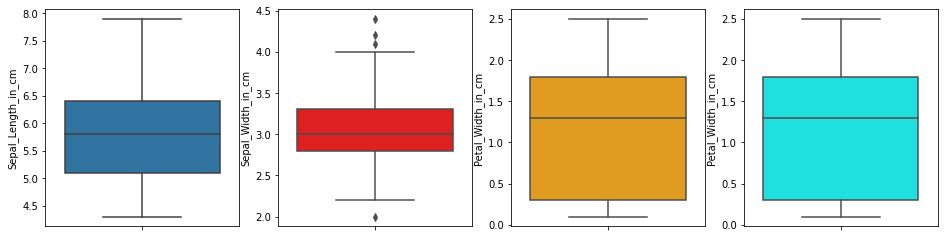

In [10]:
# Checking for outliers
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='Sepal_Length_in_cm')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='Sepal_Width_in_cm',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='Petal_Width_in_cm',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='Petal_Width_in_cm',color='cyan')
plt.show()

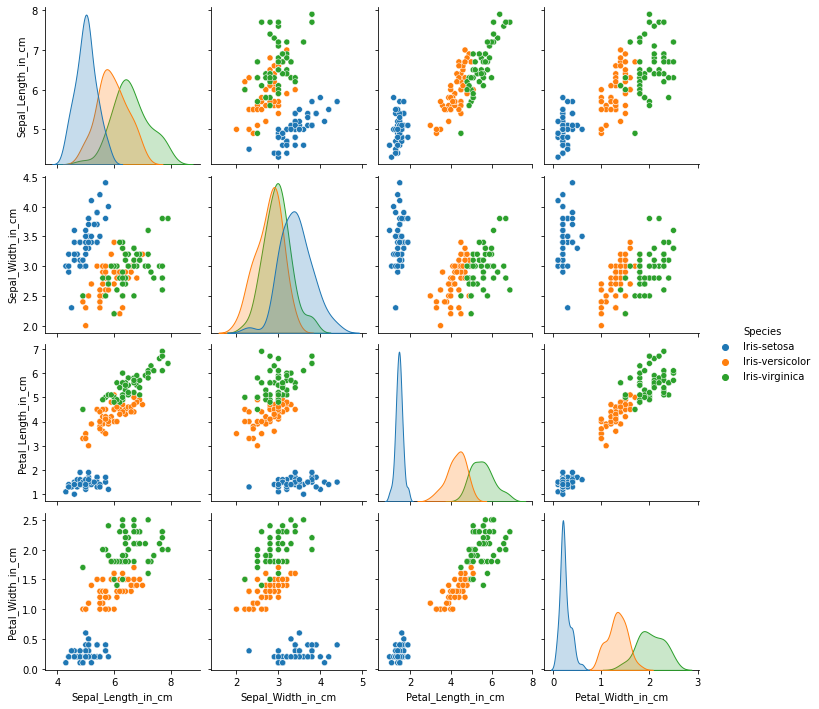

In [11]:
sns.pairplot(df,hue="Species")

<Axes: xlabel='Sepal_Width_in_cm', ylabel='Petal_Width_in_cm'>

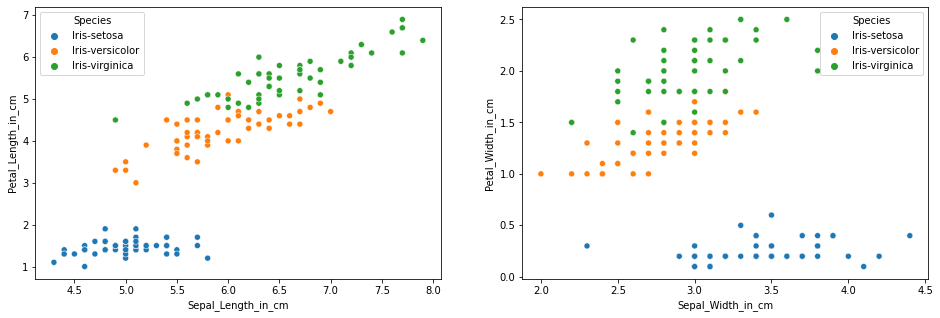

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='Sepal_Length_in_cm',y='Petal_Length_in_cm',data=df,hue='Species',ax=ax1)
sns.scatterplot(x='Sepal_Width_in_cm',y='Petal_Width_in_cm',data=df,hue='Species',ax=ax2)

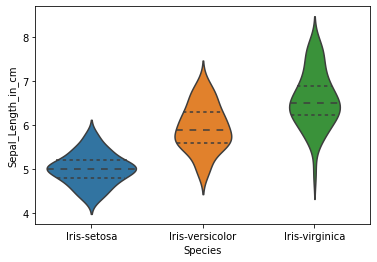

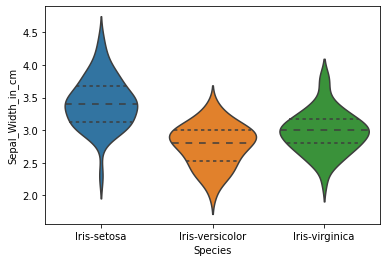

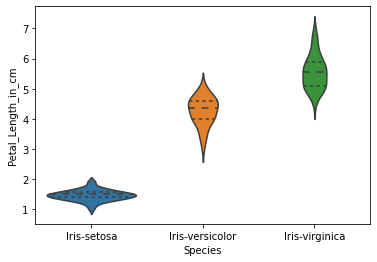

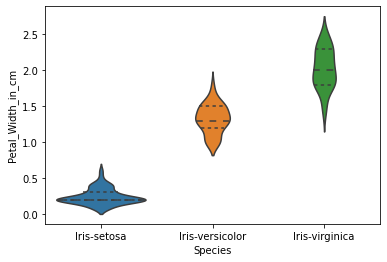

In [13]:
sns.violinplot(x='Species', y='Sepal_Length_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(x='Species', y='Sepal_Width_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(x='Species', y='Petal_Length_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(x='Species', y='Petal_Width_in_cm', data=df, inner='quartile')
plt.show()

# 4. Training Data

In [14]:
# train Test split
from sklearn.model_selection import train_test_split
# train=70
# test=30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Logistic Regression model

In [16]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [17]:
# model training
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
# performance accuracy
print("Accuracy of the model:",model.score(x_test,y_test)*100)

Accuracy of the model: 97.77777777777777


# Decision Tree

In [19]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [20]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
# performance accuracy
print("Accuracy of the model:",model.score(x_test,y_test)*100)

Accuracy of the model: 97.77777777777777


# KNN K-Nearest Neighbors

In [22]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()

In [23]:
# model training
model.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
# performance accuracy
print("Accuracy of the model:",model.score(x_test,y_test)*100)

Accuracy of the model: 97.77777777777777
